<a href="https://colab.research.google.com/github/fatemehes75/Capital_Market/blob/main/Predicting_Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Credit Risk with Python

Credit risk, the uncertainty that a borrower might not fulfill their debt obligations, is a paramount concern for financial institutions.
Banking and financial services want to know how data is utilized to reduce the risk of losing money when lending money to consumers.


A person’s credit risk is influenced by a variety of elements.
In today's tech-driven world, financial organizations are leveraging the power of machine learning to anticipate and manage credit risk effectively.

The **main goal of this study** is to find distinctive patterns that may be used to spot consumers who could have trouble making their installment payments.

Project's Objective: Building a Credit Risk Prediction Model

Three key phases of this project:

**1. Data Wrangling (Cleaning and Exploration)**

  In this initial phase, I focus on cleaning and organizing the data. This step is crucial as it ensures that the data we feed into our model is accurate, complete, and ready for analysis.

**2. Model Development and Evaluation**

  The heart of the project lies in building and assessing the predictive models. I utilize Python to create and train machine learning models on our prepared dataset. These models will then undergo evaluation to assess their performance.

**3. Hyperparameter Tuning**

Hyperparameters are configuration settings for machine learning algorithms that are not learned from the data but are set prior to training. Properly tuning these hyperparameters can significantly impact the model's performance. Tunning typically involves techniques such as grid search, random search, or Bayesian optimization. **Grid search explores all possible combinations of hyperparameters**, which needs cloud-based services. Due to lack of computational power of my computer, **I used random search in this project which uses a fixed number of random combinations to evaluate**.

### About Dataset

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

There are **25** variables:

* **ID:** ID of each client
* **LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit
* **SEX:** Gender (1=male, 2=female)
* **EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE:** Marital status (1=married, 2=single, 3=others)
* **AGE:** Age in years
* **PAY_0:** Repayment status in September, 2005 (-1=pay duly, 1=payment delay for
one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2:** Repayment status in August, 2005 (scale same as above)
* **PAY_3:** Repayment status in July, 2005 (scale same as above)
* **PAY_4:** Repayment status in June, 2005 (scale same as above)
* **PAY_5:** Repayment status in May, 2005 (scale same as above)
* **PAY_6:** Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1:** Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2:** Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3:** Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4:** Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5:** Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6:** Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1:** Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2:** Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3:** Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4:** Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5:** Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6:** Amount of previous payment in April, 2005 (NT dollar)
* **default.payment.next.month:** Default payment (1=yes, 0=no)

Data links: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load the data
df = pd.read_csv('UCI_Credit_Card.csv')
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


## **1. Data Wrangling**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
# Removing column ID, since it has no meaning
df.drop(["ID"], axis=1, inplace= True)

In [ ]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# checking for missing values
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

According to the dataset, the **PAY_n** columns indicate the number of months of delay whle they contain minus numbers which doesn't make sense. I adjusted them to 0.

In [ ]:
df['PAY_0'].replace({-2:0,-1:0}, inplace=True)
df['PAY_2'].replace({-2:0,-1:0}, inplace=True)
df['PAY_3'].replace({-2:0,-1:0}, inplace=True)
df['PAY_4'].replace({-2:0,-1:0}, inplace=True)
df['PAY_5'].replace({-2:0,-1:0}, inplace=True)
df['PAY_6'].replace({-2:0,-1:0}, inplace=True)

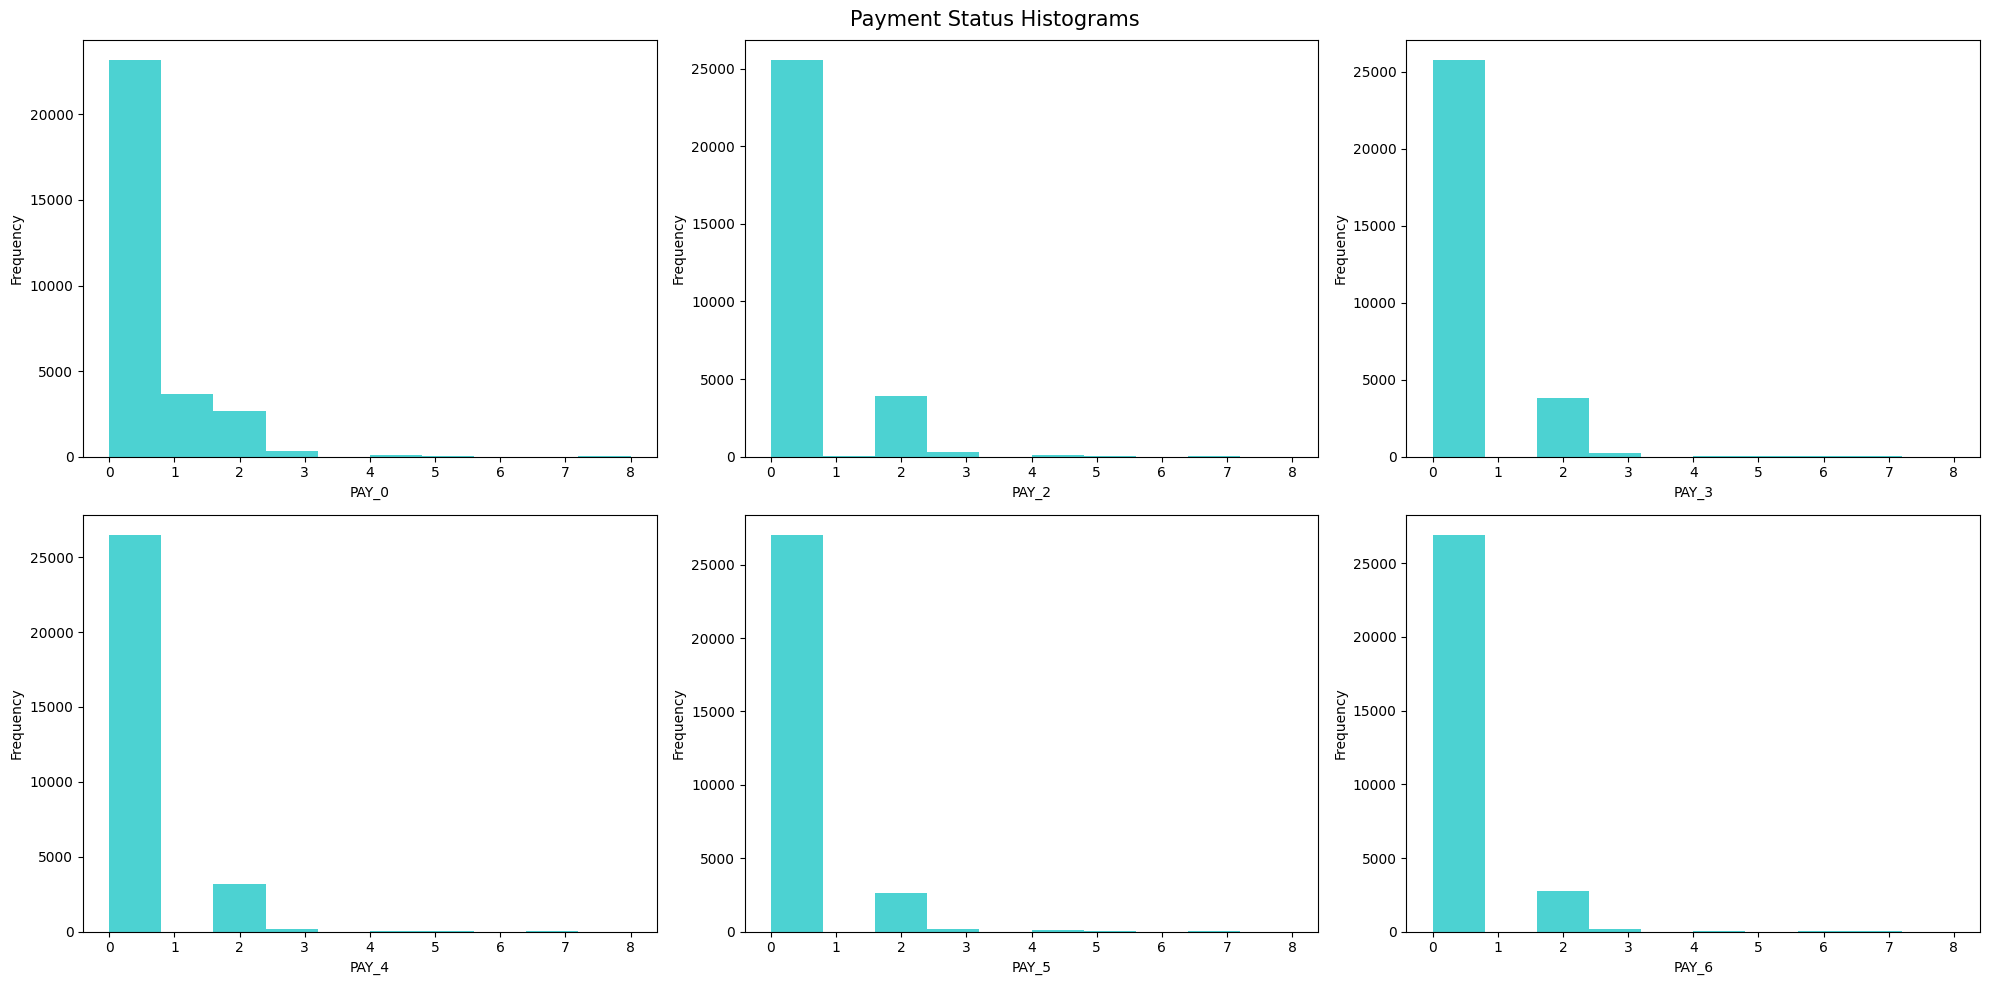

In [ ]:
late = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
plt.figure(figsize=(20, 10))
for i, column in enumerate(late.columns):
    plt.subplot(2, 3, i+1)
    plt.hist(late[column], bins=10, color='c', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.suptitle('Payment Status Histograms', fontsize=15)
plt.tight_layout()
plt.show()

** Categorical variables that are **SEX, MARRIAGE, EDUCATION**, I want to see both how our dataset is divided and if there are sparse classes which can cause overfit of our models.

**Analysis of column "SEX"**
* Gender (1=male, 2=female)

<Axes: >

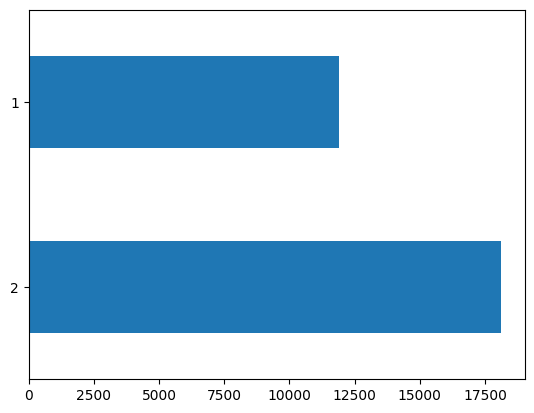

In [ ]:
df.SEX.value_counts().plot(kind = 'barh')

**Analysis of column "EDUCATION"**
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

In [ ]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

From the Data Description given, in df.EDUCATION, 5 and 6 represents "unknown", I consider 0,5 and 6 as category 4(others).

<Axes: >

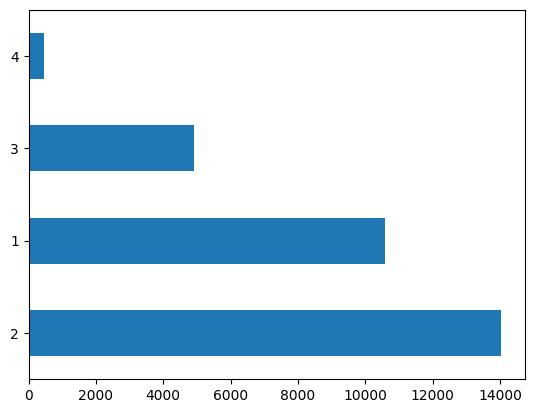

In [ ]:
df['EDUCATION'].replace({0:4,1:1,2:2,3:3,4:4,5:4,6:4}, inplace=True)
df.EDUCATION.value_counts().plot(kind = 'barh')

**Analysis of column “MARRIAGE”**
* Marital status (1=married, 2=single, 3=others)


In [ ]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

<Axes: >

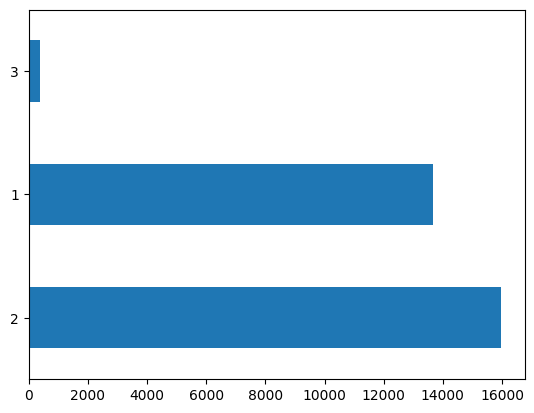

In [ ]:
df['MARRIAGE'].replace({0:3,1:1,2:2,3:3}, inplace=True)
df['MARRIAGE'].value_counts().plot(kind = 'barh')

**Data exploration using visualization**

I want to use some plots to find the *distributions*, *relationship between features* and identify the *outliners*.

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


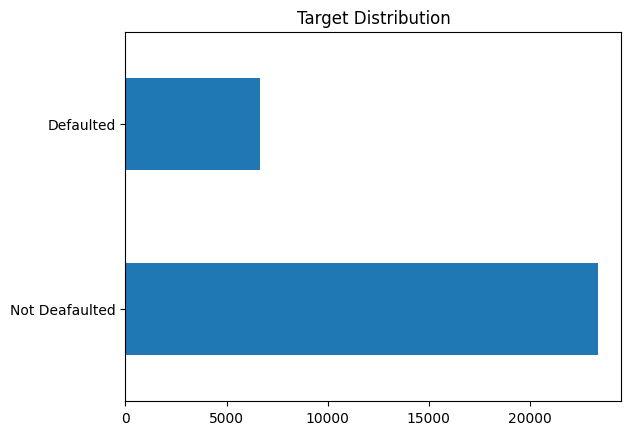

In [ ]:
df['default.payment.next.month'].value_counts().plot(kind = 'barh')
plt.yticks([0,1], labels=["Not Deafaulted", "Defaulted"])
plt.title("Target Distribution")
print(df['default.payment.next.month'].value_counts())

Text(0.5, 1.0, 'Age distribution')

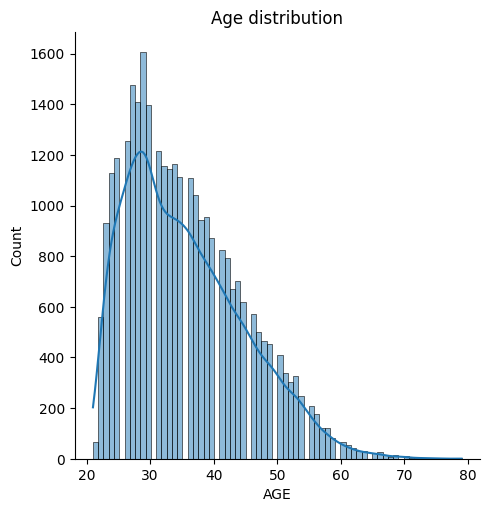

In [ ]:
#Age distribution
sns.displot(df['AGE'], kde=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Age distribution")

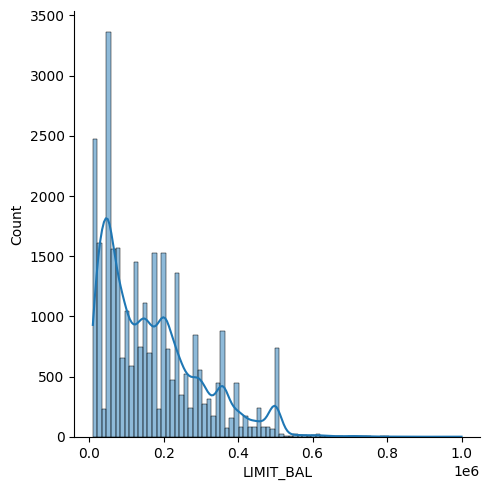

In [ ]:
#LIMIT_BAL distribution
sns.displot(df.LIMIT_BAL, kde=True)

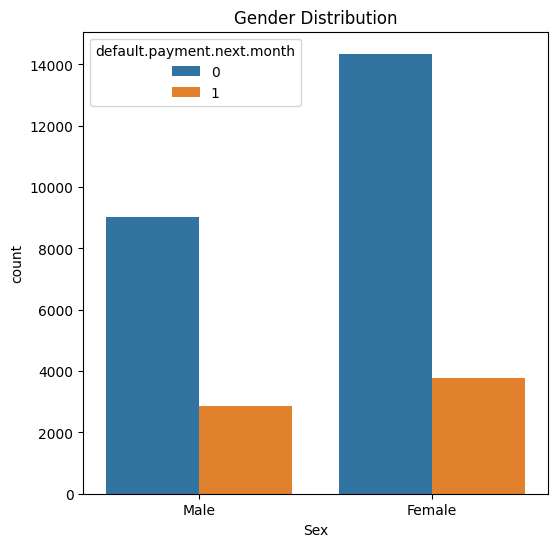

In [ ]:
#Relationship between default.payment.next.month and sex
plt.figure(figsize=(6, 6))
sns.countplot(x='SEX', hue='default.payment.next.month', data=df)
plt.xticks([0, 1], labels=["Male", "Female"])
plt.title("Gender Distribution")
plt.xlabel("Sex")
plt.show()

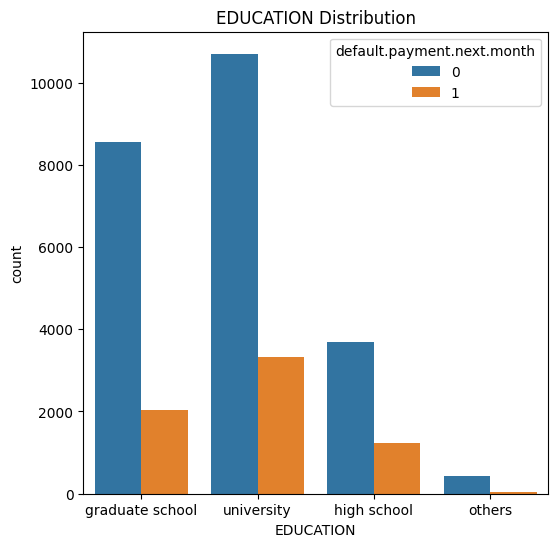

In [ ]:
#Relationship between default.payment.next.month and eduction
plt.figure(figsize=(6, 6))
sns.countplot(x='EDUCATION', hue='default.payment.next.month', data=df)
plt.xticks([0,1,2,3],labels=["graduate school", "university",'high school','others'])
plt.title("EDUCATION Distribution")
plt.xlabel("EDUCATION")
plt.show()

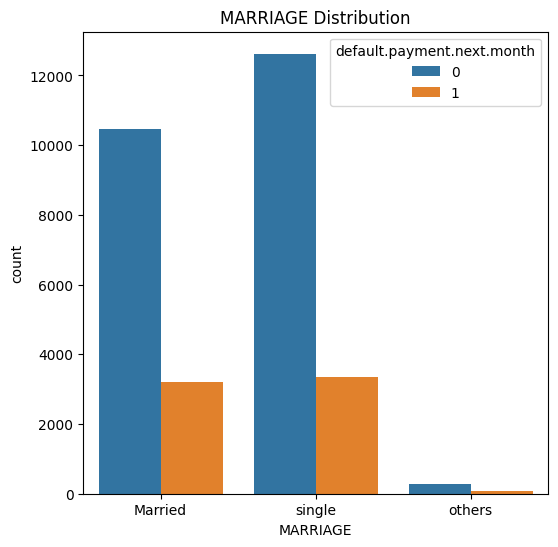

In [ ]:
#Relationship between default.payment.next.month and marriage status
plt.figure(figsize=(6, 6))
sns.countplot(x='MARRIAGE', hue='default.payment.next.month', data=df)
plt.xticks([0,1,2],labels=["Married", "single",'others'])
plt.title("MARRIAGE Distribution")
plt.xlabel("MARRIAGE")
plt.show()

<ipython-input-22-0856bfd87f57>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


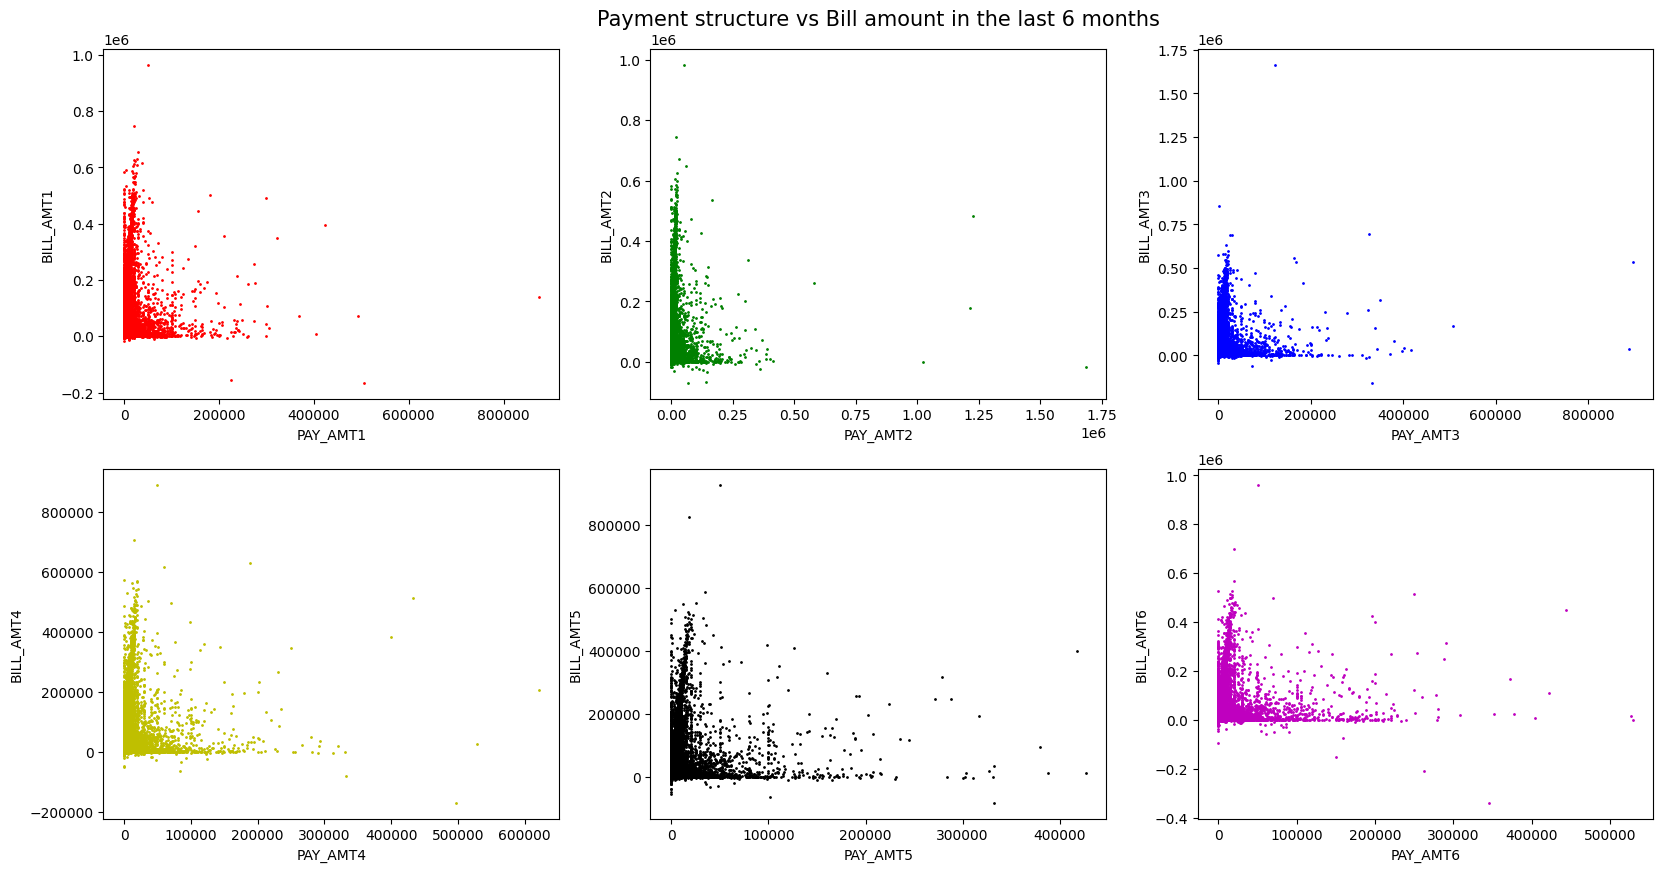

In [ ]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Payment structure vs Bill amount in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')


plt.show()

## **2. Model Development and Evaluation**

In [ ]:
# Independnet variable
X = df.drop(['default.payment.next.month'], axis=1)
# Dependent variable
y = df['default.payment.next.month']
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,0,0,0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,0,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,0,0,0,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)

In [ ]:
#split train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

### **Balancing the data**
* Our dataset is imbalanced, balancing often involves employing techniques like SMOTE (Synthetic Minority Oversampling Technique). SMOTE is a widely-used and influential data sampling algorithm in the fields of machine learning and data mining. Unlike traditional oversampling methods that simply duplicate existing minority class samples, SMOTE generates synthetic examples to balance the class distribution.

* In SMOTE, synthetic examples are created by interpolating along line segments connecting a defined number of k nearest neighbors from the minority class. In the imblearn package, the default value for k is set to five. This technique helps address class imbalance issues and improve the model's performance on minority class samples.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Before oversampling: ",Counter(y_train))
SMOTE= SMOTE()
X_train,y_train= SMOTE.fit_resample(X_train,y_train)
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 18677, 1: 5323})
After oversampling:  Counter({0: 18677, 1: 18677})


## **Building Model**
A very common technique is to use ensambles: combinations of different classifiers that create a more robust model. The main types od ensemble learning are:
* **bagging ensambles:** which reduce the chances of overfitting by spliting dataset to few subset and training in parallel and combine the results.

* **boosting ensambles:** which improve the the flexibility of simple models by training the models in sequence. Each model of will learn from the mistakes of the previous one. At the end it combines the results.

I used there two ensamble models:

* **Random Forest Classifier(bagging ensambles)**
* **XGBoost Classifier(boosting ensambles)**



**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
# Fitting the model
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Predicting the model
y_pred_rf= rf.predict(X_test)

In [ ]:
#Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
print("The accuracy of logit model is:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test,y_pred_rf))

The accuracy of logit model is: 0.7861666666666667
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4687
           1       0.51      0.47      0.49      1313

    accuracy                           0.79      6000
   macro avg       0.68      0.67      0.68      6000
weighted avg       0.78      0.79      0.78      6000



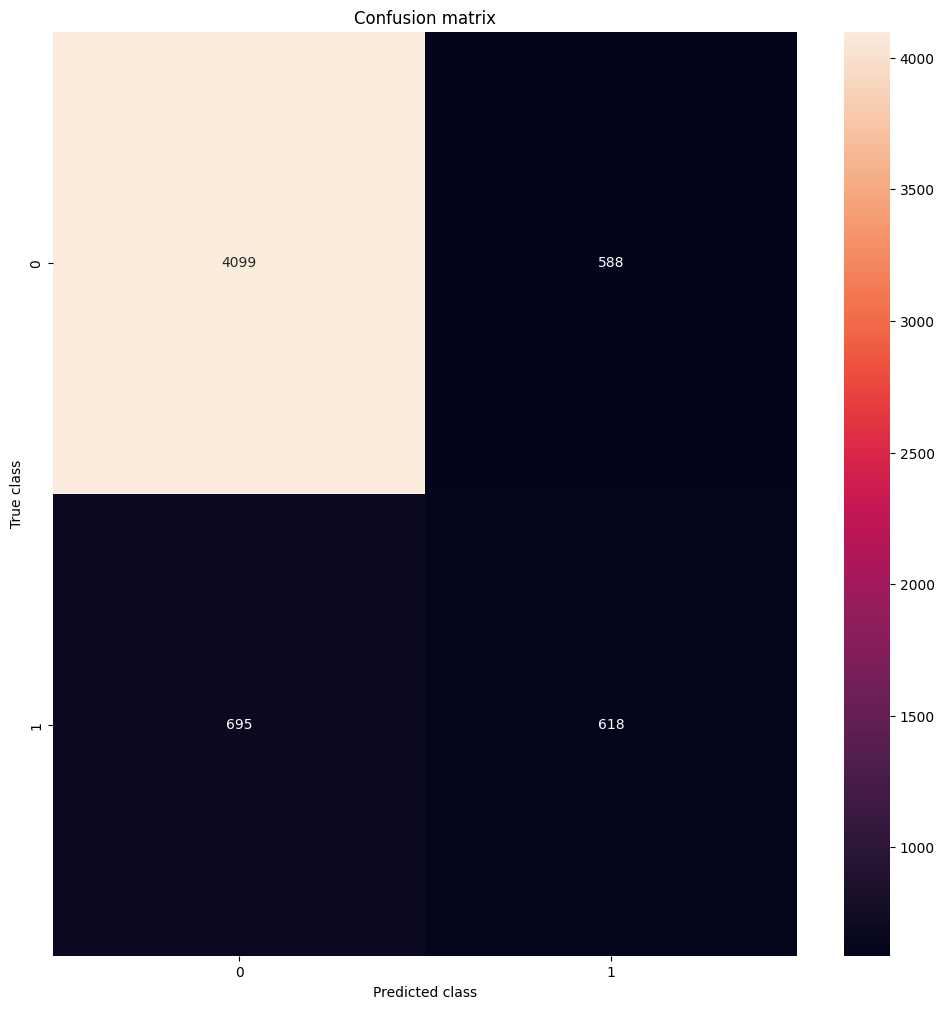

In [ ]:
# Plot confusion metrics
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=[0,1], yticklabels=[0,1], annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
plt.show()

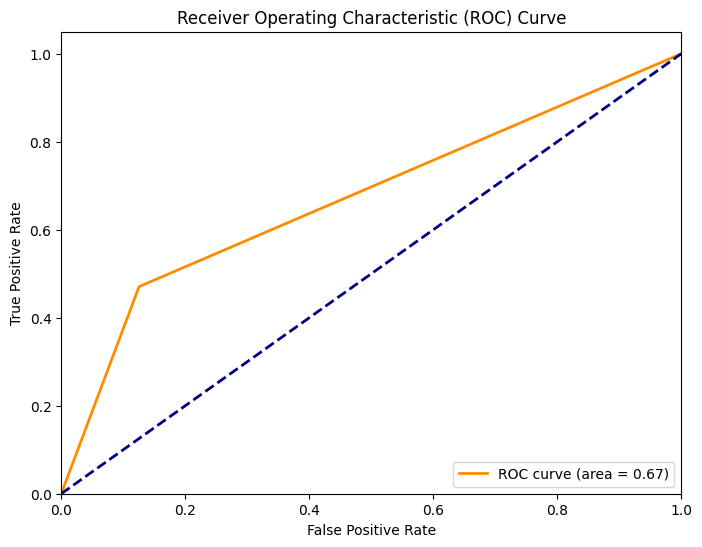

In [ ]:
#roc curve
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**XGBoost Classifier**

In [ ]:
import xgboost as xgb

xgb_clf= xgb.XGBClassifier()
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
#Predicting the model
y_pred_xgb= xgb_clf.predict(X_test)

In [ ]:
#Evaluation
print("The accuracy of logit model is:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

The accuracy of logit model is: 0.8063333333333333
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4687
           1       0.58      0.40      0.47      1313

    accuracy                           0.81      6000
   macro avg       0.71      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000



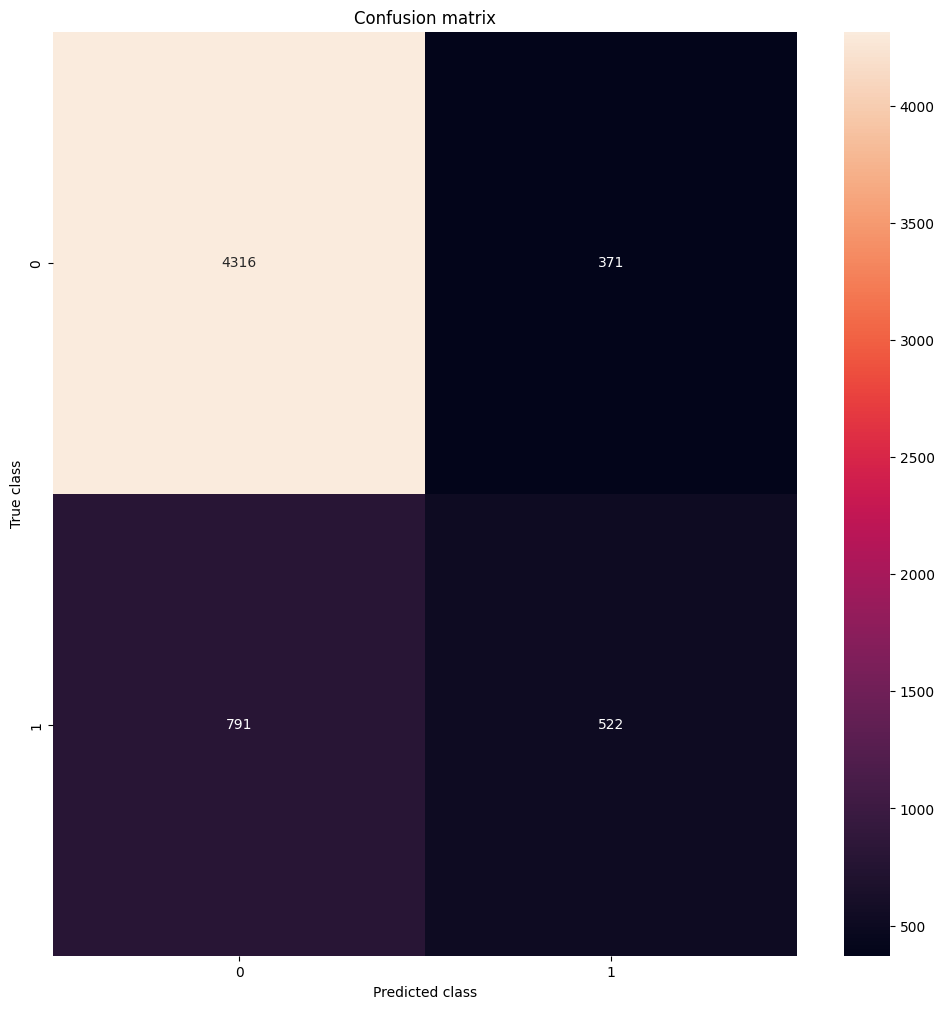

In [ ]:
# Plot confusion metrics
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=[0,1], yticklabels=[0,1], annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
plt.show()

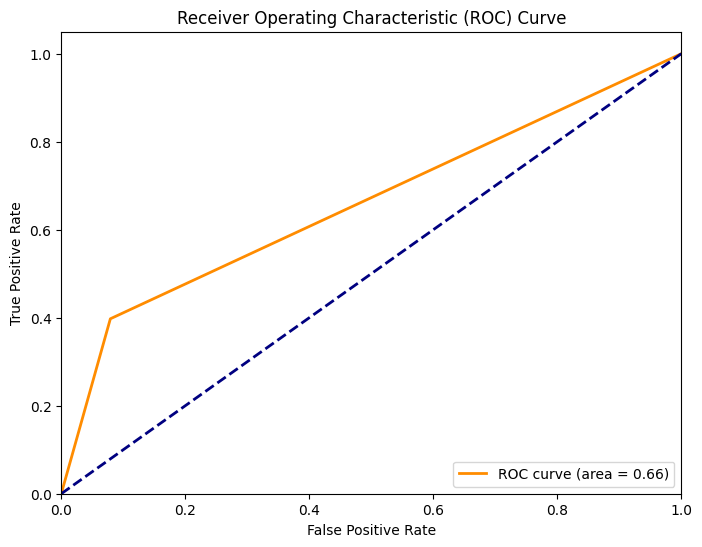

In [ ]:
#roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## **3. Hyperparameter Tuning**

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_search = RandomizedSearchCV(xgb_clf, param_distributions=params, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='accuracy', verbose=2)

In [ ]:
# Finding the best estimators
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 12,
 'learning_rate': 0.1,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [ ]:
xgb_clf_tunned=xgb.XGBClassifier(objective='binary:logistic',
                                  gamma=0.0,
                                  learning_rate= 0.1,
                                  max_depth=12,
                                  min_child_weight=7,
                                  colsample_bytree=0.5,
                                  use_label_encoder=False)

# Fitting the model
xgb_clf_tunned.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Predicting model
y_pred_xgb_tunned= xgb_clf_tunned.predict(X_test)

In [ ]:
#Evaluation
print("The accuracy of the model is:", accuracy_score(y_test, y_pred_xgb_tunned))
print(classification_report(y_test,y_pred_xgb_tunned))

The accuracy of the model is: 0.8045
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4687
           1       0.58      0.40      0.47      1313

    accuracy                           0.80      6000
   macro avg       0.71      0.66      0.68      6000
weighted avg       0.79      0.80      0.79      6000



In [ ]:
#k-fold Cross-validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgb_clf_tunned,X,y,cv=10)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

In [ ]:
print(score)
print(score.mean())

[0.808      0.807      0.81466667 0.80533333 0.81433333 0.82566667
 0.83266667 0.82766667 0.82733333 0.817     ]
0.8179666666666667


**Conclusion:**

I have built the credit risk model by using python. I have tried with 2 different machine learning algorithms: **Random Forest, and Xgboost classifier**. I have also done hyperparameter tuning and cross-validation. The final accuracy of the model we achieved was **%**.